In [8]:
!pip install neattext


In [9]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
#import plotly.express as px
#!pip install neattext
import neattext as ntx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics

In [10]:
file_path = '/content/sample_data/vaccination_all_tweets.csv'
va_df = pd.read_csv(file_path, encoding= 'unicode_escape')
#va_df = pd.read_csv('vaccination_all_tweets.csv')
va_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [11]:
file_path = '/content/sample_data/country_vaccinations.csv'
co_df = pd.read_csv(file_path, encoding= 'unicode_escape')
#co_df = pd.read_csv('country_vaccinations.csv')
co_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [12]:
va_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211184 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [13]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              39113 non-null  object 
 1   iso_code                             39113 non-null  object 
 2   date                                 39113 non-null  object 
 3   total_vaccinations                   21551 non-null  float64
 4   people_vaccinated                    20604 non-null  float64
 5   people_fully_vaccinated              17728 non-null  float64
 6   daily_vaccinations_raw               17713 non-null  float64
 7   daily_vaccinations                   38855 non-null  float64
 8   total_vaccinations_per_hundred       21551 non-null  float64
 9   people_vaccinated_per_hundred        20604 non-null  float64
 10  people_fully_vaccinated_per_hundred  17728 non-null  float64
 11  daily_vaccinations_per_milli

In [14]:
display(va_df.shape, str(va_df.shape[0])+" tweets in dataset")

(228207, 16)

'228207 tweets in dataset'

In [15]:
va_df['date'] = pd.to_datetime(va_df['date']).dt.date  #converting date column to date format
va_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [16]:
va_df.drop(columns={"id","user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True)
# dropping unnecessary columns

In [17]:
pd.set_option('display.max_colwidth', 700)
va_df.head()

,user_location,date,text
0,"La Crescenta-Montrose, CA",2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"San Francisco, CA",2020-12-13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm"
2,Your Bed,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ¦ https://t.co/ieYlCKBr8P
3,"Vancouver, BC - Canada",2020-12-12,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ¦ https://t.co/jqgV18kch4"
4,NaN,2020-12-12,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ¦ https://t.co/KxbSRoBEHq


In [18]:
# Cleaning the data using neattext library
va_df['clean_data_col']=va_df['text'].apply(ntx.remove_hashtags)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_urls)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_userhandles)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_multiple_spaces)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_special_characters)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_puncts)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.fix_contractions)
va_df['clean_data_col']=va_df['clean_data_col'].apply(ntx.remove_numbers)



In [19]:
va_df[['clean_data_col','text']].head()

,clean_data_col,text
0,same folks said daikon paste could treat a cytokine storm,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm"
2,russian vaccine is created to last years,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ¦ https://t.co/ieYlCKBr8P
3,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born i,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ¦ https://t.co/jqgV18kch4"
4,explain to me again why we need a vaccine,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ¦ https://t.co/KxbSRoBEHq


In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# function to remove stopwords
stop_words = stopwords.words('english')

def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)

  return clean_tweet

In [22]:
va_df['clean_data_col'] = va_df['clean_data_col'].apply(lambda x: stopWords(x))

In [23]:
va_df.head()

,user_location,date,text,clean_data_col
0,"La Crescenta-Montrose, CA",2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,folks said daikon paste could treat cytokine storm
1,"San Francisco, CA",2020-12-13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm",world wrong side history year hopefully biggest vaccination effort weve ev
2,Your Bed,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ¦ https://t.co/ieYlCKBr8P,russian vaccine created last years
3,"Vancouver, BC - Canada",2020-12-12,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ¦ https://t.co/jqgV18kch4",facts immutable senator even youre ethically sturdy enough acknowledge born
4,NaN,2020-12-12,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ¦ https://t.co/KxbSRoBEHq,explain need vaccine


In [24]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [25]:
va_df['results'] = va_df['clean_data_col'].apply(blob_fun)

In [26]:
va_df.head()

,user_location,date,text,clean_data_col,results
0,"La Crescenta-Montrose, CA",2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,folks said daikon paste could treat cytokine storm,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}"
1,"San Francisco, CA",2020-12-13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm",world wrong side history year hopefully biggest vaccination effort weve ev,"{'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}"
2,Your Bed,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ¦ https://t.co/ieYlCKBr8P,russian vaccine created last years,"{'polarity': 0.0, 'subjectivity': 0.03333333333333333, 'sentiment': 'Neutral'}"
3,"Vancouver, BC - Canada",2020-12-12,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ¦ https://t.co/jqgV18kch4",facts immutable senator even youre ethically sturdy enough acknowledge born,"{'polarity': 0.1, 'subjectivity': 0.55, 'sentiment': 'Positive'}"
4,NaN,2020-12-12,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ¦ https://t.co/KxbSRoBEHq,explain need vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}"


In [27]:
va_df = va_df.join(pd.json_normalize(va_df['results']))

In [28]:
va_df.head()

,user_location,date,text,clean_data_col,results,polarity,subjectivity,sentiment
0,"La Crescenta-Montrose, CA",2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,folks said daikon paste could treat cytokine storm,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.000000,Neutral
1,"San Francisco, CA",2020-12-13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm",world wrong side history year hopefully biggest vaccination effort weve ev,"{'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}",-0.5,0.900000,Negative
2,Your Bed,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 yearsâ¦ https://t.co/ieYlCKBr8P,russian vaccine created last years,"{'polarity': 0.0, 'subjectivity': 0.03333333333333333, 'sentiment': 'Neutral'}",0.0,0.033333,Neutral
3,"Vancouver, BC - Canada",2020-12-12,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born iâ¦ https://t.co/jqgV18kch4",facts immutable senator even youre ethically sturdy enough acknowledge born,"{'polarity': 0.1, 'subjectivity': 0.55, 'sentiment': 'Positive'}",0.1,0.550000,Positive
4,NaN,2020-12-12,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTechâ¦ https://t.co/KxbSRoBEHq,explain need vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.000000,Neutral


In [29]:
va_df.sentiment.value_counts()

,count
sentiment,
Neutral,137495
Positive,68317
Negative,22395


In [30]:
#Set X to tweets_text(clean_data_col) and y to sentiment
X = va_df.clean_data_col
y = va_df.sentiment

In [31]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [32]:
#Print the number of positive, negative, and neutral tweets in train and test sets.
print(y_train.value_counts())
print('#########')
print(y_test.value_counts())

sentiment
Neutral     96503
Positive    47601
Negative    15640
Name: count, dtype: int64
#########
sentiment
Neutral     40992
Positive    20716
Negative     6755
Name: count, dtype: int64


In [33]:
#we fit our tfidf vectorizer with the training tweets and transform both train and test set tweets
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test  = tfidf_vectorizer.transform(X_test)

In [34]:
#Usuing logistic regression model with 5 fold cross validation for classification. Fit the model with the training data.
LRmodel = LogisticRegressionCV(cv=5, max_iter = 2500, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=2500, n_jobs=-1)

In [35]:
# make predictions on test data
predicted_train = LRmodel.predict(X_train)
predicted_test = LRmodel.predict(X_test)

LRmodel_train_accuracy = (np.mean(predicted_train == y_train))
print("Training accuracy: ", LRmodel_train_accuracy)
LRmodel_test_accuracy = (np.mean(predicted_test == y_test))
print("Test accuracy: ", LRmodel_test_accuracy)
print()

# print precision and recall statistics
print(metrics.classification_report(y_test, predicted_test))

# print confusion matrix
print("Confusion Matrix:\n")
pd.DataFrame(
    metrics.confusion_matrix(y_test, predicted_test),
    index=['actual:negative', 'actual:neutral', 'actual:positive'],
    columns=['pred:negative', 'pred:neutral', 'pred:positive']
)

Training accuracy:  0.8072165464743589
Test accuracy:  0.804390692782963

              precision    recall  f1-score   support

    Negative       0.87      0.33      0.48      6755
     Neutral       0.77      0.98      0.87     40992
    Positive       0.90      0.61      0.73     20716

    accuracy                           0.80     68463
   macro avg       0.85      0.64      0.69     68463
weighted avg       0.82      0.80      0.79     68463

Confusion Matrix:



,pred:negative,pred:neutral,pred:positive
actual:negative,2232,3862,661
actual:neutral,63,40253,676
actual:positive,273,7857,12586


In [36]:
deep = va_df.drop(columns="results")
deep.head(2)

,user_location,date,text,clean_data_col,polarity,subjectivity,sentiment
0,"La Crescenta-Montrose, CA",2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,folks said daikon paste could treat cytokine storm,0.0,0.0,Neutral
1,"San Francisco, CA",2020-12-13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've evâ¦ https://t.co/dlCHrZjkhm",world wrong side history year hopefully biggest vaccination effort weve ev,-0.5,0.9,Negative


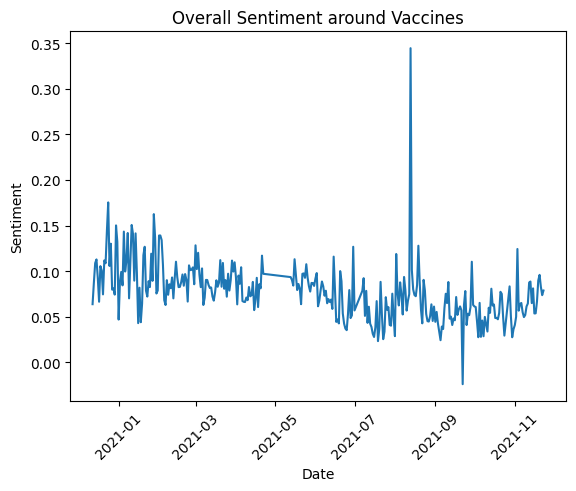

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming deep is your original DataFrame
total = pd.DataFrame()
total['date'] = sorted(deep['date'].unique())

senti = []
for date in total['date']:
    senti.append(deep[deep['date'] == date]['polarity'].mean())

total['sentiment'] = senti

# Plotting using Matplotlib
plt.plot(total['date'], total['sentiment'])
plt.title('Overall Sentiment around Vaccines')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
